In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Data Preparation.

Compile C++ source code and run all test cases to generate results over the given datasets.

In [48]:
!sh ./test.sh

-- Configuring done
-- Generating done
-- Build files have been written to: /home/aguang/Repositories/fdc/build
make: Entering directory '/home/aguang/Repositories/fdc/build'
make[1]: Entering directory '/home/aguang/Repositories/fdc/build'
make[2]: Entering directory '/home/aguang/Repositories/fdc/build'
make[2]: Leaving directory '/home/aguang/Repositories/fdc/build'
[ 13%] Built target fdc
make[2]: Entering directory '/home/aguang/Repositories/fdc/build'
make[2]: Leaving directory '/home/aguang/Repositories/fdc/build'
[ 22%] Built target fdc-cli
make[2]: Entering directory '/home/aguang/Repositories/fdc/build'
make[2]: Leaving directory '/home/aguang/Repositories/fdc/build'
[ 31%] Built target gtest
make[2]: Entering directory '/home/aguang/Repositories/fdc/build'
Scanning dependencies of target fdc-test
make[2]: Leaving directory '/home/aguang/Repositories/fdc/build'
make[2]: Entering directory '/home/aguang/Repositories/fdc/build'
[ 36%] Building CXX object test/CMakeFiles/fdc-tes

Load data from yaml file.

In [49]:
from yaml import safe_load

with open("./dataset.analyse.yaml") as file:
    datasets = safe_load(file.read())

## Comparision between Different Algorithms.

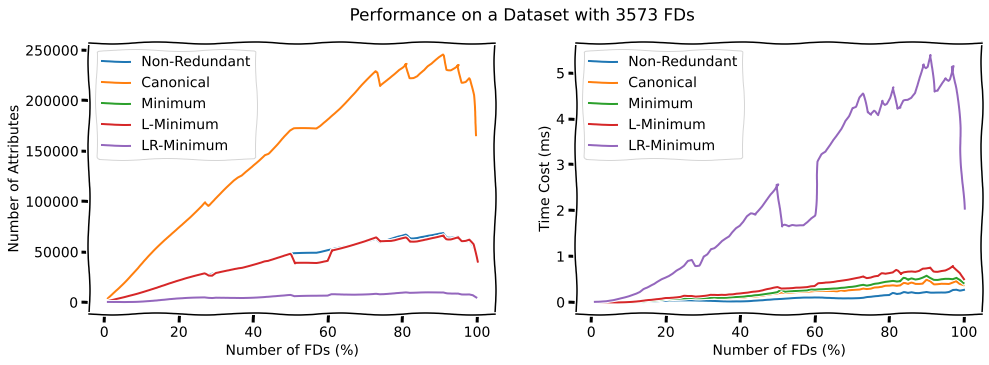

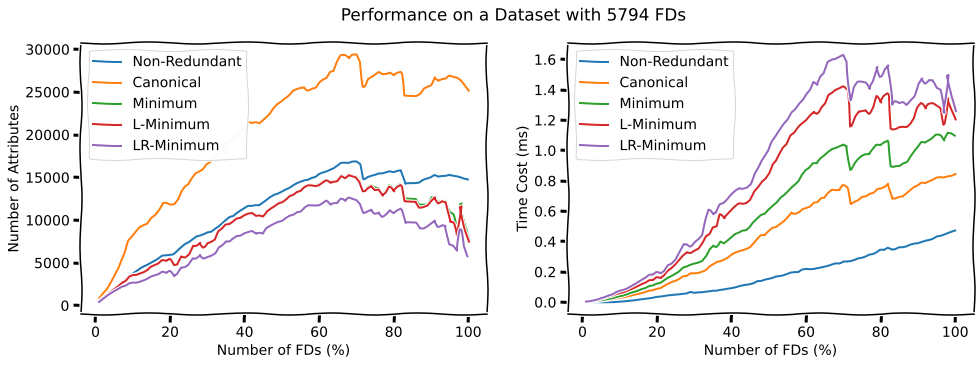

In [50]:
def draw_diagram(dataset):

    with plt.xkcd():

        x = np.arange(0, 100, 5)

        fig, axes = plt.subplots(1, 2, figsize=(16, 5))

        fig.suptitle("Performance on a Dataset with {} FDs".format(dataset['Metrics'][-1]['Fds']))

        axes[0].set_xlabel("Number of FDs (%)")
        axes[0].set_ylabel("Number of Attributes")
        
        algos = dataset['Metrics'][0]['Algos']
        
        x = [metric['Pct'] for metric in dataset['Metrics']]
        
        for idx, algo in enumerate(algos):
            y = [metric['Algos'][idx]['Attrs'] for metric in dataset['Metrics']]
            axes[0].plot(x, y, label = algo['Name'])

        axes[0].legend()

        axes[1].set_xlabel("Number of FDs (%)")
        axes[1].set_ylabel("Time Cost (ms)")

        for idx, algo in enumerate(algos):
            y = [metric['Algos'][idx]['Time'] for metric in dataset['Metrics']]
            axes[1].plot(x, y, label = algo['Name'])
            
        axes[1].legend()

    return plt.show()

for dataset in datasets:
    draw_diagram(dataset)